In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as fits
import numpy as np
import scipy.stats as stats
import astropy.units as u
from scipy.stats import norm, uniform, cauchy
import statsmodels.api as api

In [46]:
## Get data

data = pd.read_csv('statsdemo.csv', names=['time', 'mag_outlier', 'mag_het', 'mag_het_err'],skiprows=1)

data

,time,mag_outlier,mag_het,mag_het_err
0,0.000000,18.530677,18.567447,0.067345
1,0.176158,18.551560,18.547315,0.017149
2,0.250165,18.468095,18.564191,0.020600
3,1.426983,18.537368,18.554162,0.074339
4,1.677148,18.790521,18.514765,0.027469
...,...,...,...,...
69,10.757089,18.571678,18.466822,0.045315
70,10.933247,18.554656,18.630141,0.072181
71,11.007254,18.553508,18.568285,0.087981
72,11.507584,18.558386,18.462255,0.087348


In [7]:
outlier_mean = np.mean(data.mag_outlier)
outlier_std = np.std(data.mag_outlier)

print(outlier_mean, outlier_std)

18.561082466856572 0.07128179566341668


/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1000x1000 with 0 Axes>

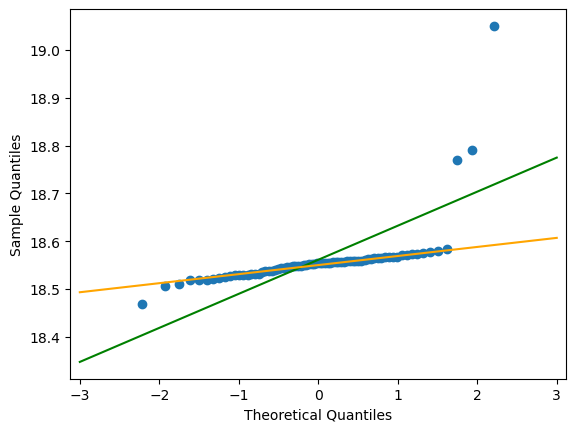

In [47]:
def y(mean, std, x):
    return mean+std*x


per_25 = np.percentile(data.mag_outlier, 25)
## Finds x which encloses 25% of data in normal dist
x_25 = stats.norm.ppf(0.25)
per_75 = np.percentile(data.mag_outlier, 75)
## Finds x which encloses 75% of data in normal dist
x_75 = stats.norm.ppf(0.75)

plt.figure(figsize=(10,10))

## QQ Plot
api.qqplot(data.mag_outlier, norm, color='blue',label='Normal')

## Estimate for normal dist - y = mean + sigma*x
plt.plot(np.linspace(-3,3,100),y(outlier_mean,outlier_std,np.linspace(-3,3,100)),'-',color='green')

## Estimate - IQR
plt.plot(np.linspace(-3,3,100),np.linspace(-3,3,100)*(per_75-per_25)/(x_75-x_25)+18.55,color='orange')

## Percentiles
#plt.axvline(x_25,color='k')
#plt.axvline(x_75,color='k')

<Figure size 1000x1000 with 0 Axes>

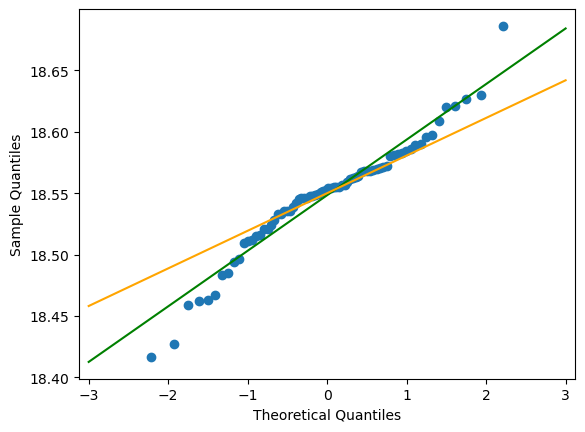

In [53]:
per_25 = np.percentile(data.mag_het, 25)
## Finds x which encloses 25% of data in normal dist
x_25 = stats.norm.ppf(0.25)
per_75 = np.percentile(data.mag_het, 75)
## Finds x which encloses 75% of data in normal dist
x_75 = stats.norm.ppf(0.75)

plt.figure(figsize=(10,10))

## QQ Plot
api.qqplot(data.mag_het, norm, color='blue',label='Normal')

## Estimate for normal dist - y = mean + sigma*x
plt.plot(np.linspace(-3,3,100),y(np.mean(data.mag_het),np.std(data.mag_het),np.linspace(-3,3,100)),'-',color='green')

## Estimate - IQR
plt.plot(np.linspace(-3,3,100),np.linspace(-3,3,100)*(per_75-per_25)/(x_75-x_25)+18.55,color='orange')

## Percentiles
#plt.axvline(x_25,color='k')
#plt.axvline(x_75,color='k')

<Figure size 1000x1000 with 0 Axes>

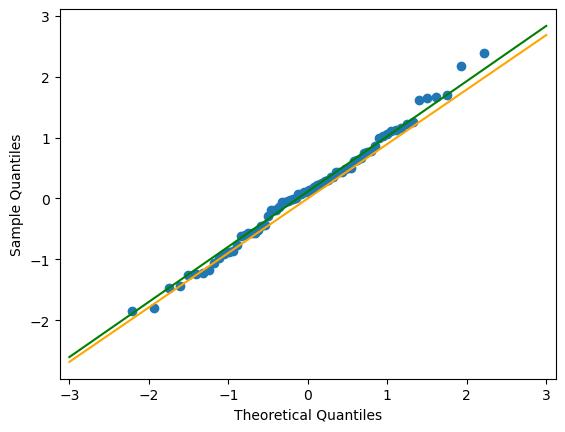

In [58]:
#### Subtract mean of maghet & divide by magheterr

per_25 = np.percentile(quantity, 25)
## Finds x which encloses 25% of data in normal dist
x_25 = stats.norm.ppf(0.25)
per_75 = np.percentile(quantity, 75)
## Finds x which encloses 75% of data in normal dist
x_75 = stats.norm.ppf(0.75)

plt.figure(figsize=(10,10))

quantity = (data.mag_het-np.mean(data.mag_het))/data.mag_het_err

## QQ Plot
api.qqplot(quantity, norm, color='blue',label='Normal')

## Estimate for normal dist - y = mean + sigma*x
plt.plot(np.linspace(-3,3,100),y(np.mean(quantity),np.std(quantity),np.linspace(-3,3,100)),'-',color='green')

## Estimate - IQR
plt.plot(np.linspace(-3,3,100),np.linspace(-3,3,100)*(per_75-per_25)/(x_75-x_25),color='orange')

## Percentiles
#plt.axvline(x_25,color='k')
#plt.axvline(x_75,color='k')

In [35]:
x_75-x_25


2.6